In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pydataset
import scipy.stats


In [3]:
dataset = pd.read_csv("SraRunInfo.csv", nrows=5000) # The data originally repeated after row 5000 (TODO: check why)

# Characterizing the data labeled with the serotypes

In [4]:
# Partition of the data according to serotype
non_labeled = dataset[(dataset.ScientificName == "Dengue virus") | (dataset.ScientificName == "Orthoflavivirus denguei")] 
type1 = dataset[(dataset.ScientificName == "dengue virus type 1") | (dataset.ScientificName == "dengue virus type I")]
type2 = dataset[(dataset.ScientificName == "dengue virus type 2") | (dataset.ScientificName == "Dengue virus type I") | (dataset.ScientificName == "Dengue virus 2 16681-PDK53")]
type3 = dataset[dataset.ScientificName == "dengue virus type 3"]
type4 = dataset[dataset.ScientificName == "dengue virus type 4"]
labeled = dataset[(dataset.ScientificName != "Dengue virus") & (dataset.ScientificName != "Orthoflavivirus denguei")]

non_labeled_length = non_labeled.shape[0]
type1_length = type1.shape[0]
type2_length = type2.shape[0]
type3_length = type3.shape[0]
type4_length = type4.shape[0]
labeled_length = type1_length +  type2_length + type3_length + type4_length
print("Number of samples: " + str(non_labeled_length + labeled_length) + ", representing " + str(sum(dataset["size_MB"])/1000) +" Gb of data (.sra)")
print("I) Number of samples non labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(non_labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("II) Number of samples labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 1: " + str(type1_length) + ", representing " + str(sum(type1["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 2: " + str(type2_length) + ", representing " + str(sum(type2["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 3: " + str(type3_length) + ", representing " + str(sum(type3["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 4: " + str(type4_length) + ", representing " + str(sum(type4["size_MB"])/1000) +" Gb of data (.sra)")

Number of samples: 4942, representing 1081.572 Gb of data (.sra)
I) Number of samples non labeled with serotype: 4573, representing 978.365 Gb of data (.sra)
II) Number of samples labeled with serotype: 4573, representing 103.207 Gb of data (.sra)
    - Number of samples labeled as type 1: 142, representing 47.059 Gb of data (.sra)
    - Number of samples labeled as type 2: 152, representing 14.812 Gb of data (.sra)
    - Number of samples labeled as type 3: 68, representing 35.083 Gb of data (.sra)
    - Number of samples labeled as type 4: 7, representing 0.624 Gb of data (.sra)


Text(0.5, 1.0, 'Proportion of samples labeled with serotypes')

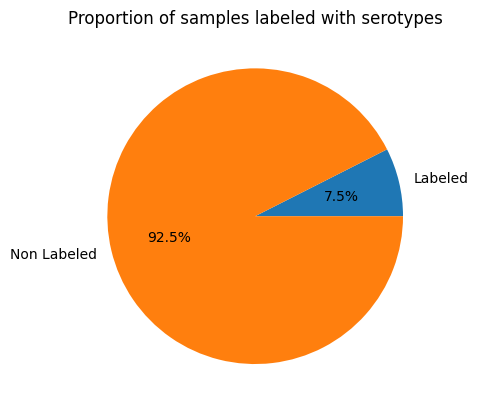

In [5]:

labels = 'Labeled', 'Non Labeled'
sizes = [labeled_length, non_labeled_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with serotypes")

Text(0.5, 1.0, 'Proportion of data (in format .sra) labeled with serotypes')

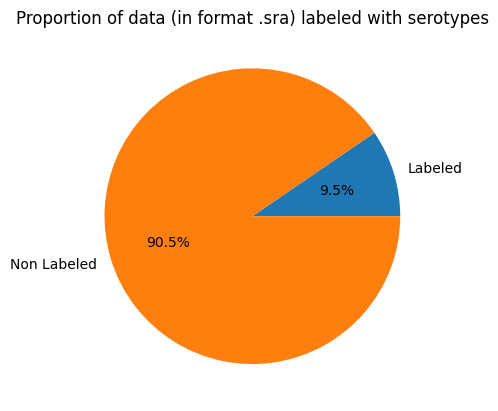

In [6]:
labels = 'Labeled', 'Non Labeled'
sizes = [sum(labeled["size_MB"]), sum(non_labeled["size_MB"])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (in format .sra) labeled with serotypes")


Text(0.5, 1.0, 'Proportion of samples labeled with each serotypes')

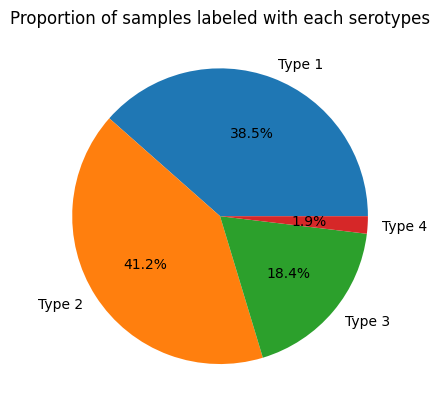

In [7]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [type1_length, type2_length, type3_length, type4_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with each serotypes")

Text(0.5, 1.0, 'Proportion of data (.sra) labeled with each serotypes')

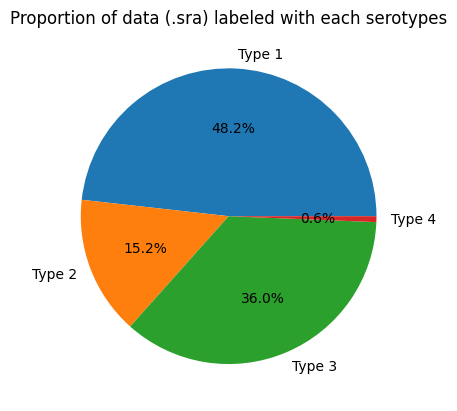

In [8]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [sum(type1["size_MB"])/1000, sum(type2["size_MB"])/1000, sum(type3["size_MB"])/1000, sum(type4["size_MB"])/1000]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (.sra) labeled with each serotypes")

# Characterizing  the data

Note that some fields (eg. Sex,Disease,Affection_Status,Histological_Type,Body_Site) are empty for all entries.

## Strategies (LibraryStrategy header)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# STEP 0: Make sure you have these five real DataFrames in your namespace:
#         labeled, type1, type2, type3, type4
#
# e.g.
#    labeled = pd.read_csv("labeled.csv")
#    type1   = pd.read_csv("type1.csv")
#    … etc …
# -----------------------------------------------------------------------------

# Bundle them into lists so the function itself never needs more arguments
_TYPE_DFS    = [type1, type2, type3, type4]
_TYPE_LABELS = ["Type 1",    "Type 2",    "Type 3",    "Type 4"]
_COLORS      = ['r',         'b',         'y',         'g']

def plot_by_column(col):
    """
    Plots a stacked bar chart of the counts of each distinct value in
    `labeled[col]` across the four DataFrames type1..type4.

    Only argument:
      col (str): the column name to inspect in all five DataFrames.
    """
    # 1) Get the list of categories from the reference DataFrame
    cats = labeled[col].dropna().unique()

    # 2) We'll stack bars on top of each other:
    bottom = np.zeros(len(cats), dtype=int)

    # 3) For each of the type‐DataFrames compute counts & draw its layer
    for df, lbl, color in zip(_TYPE_DFS, _TYPE_LABELS, _COLORS):
        # value_counts() → Series indexed by category
        vc = df[col].value_counts().reindex(cats, fill_value=0)
        counts = vc.values

        plt.bar(cats, counts, bottom=bottom, color=color, label=lbl)
        bottom += counts

    # 4) Finalize
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Stacked counts of '{col}' by type")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Strategies used (whole dataset)')

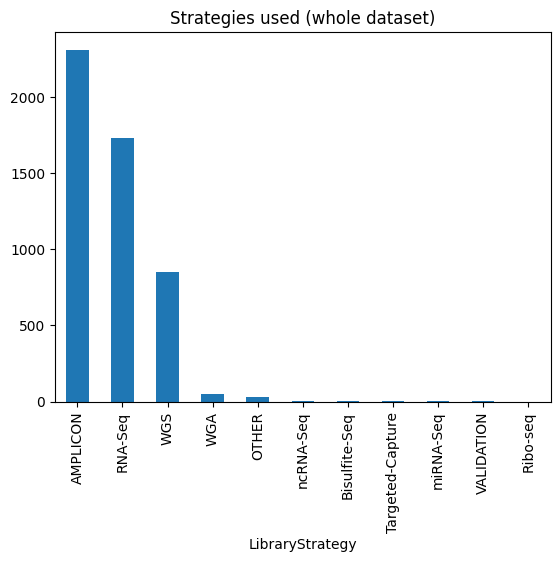

In [10]:
dataset["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (whole dataset)")

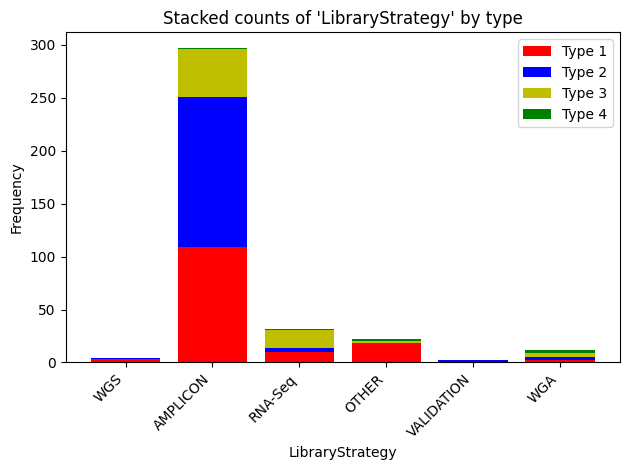

In [11]:
plot_by_column("LibraryStrategy")


Text(0.5, 1.0, 'Strategies used (type 4 only, for visibility)')

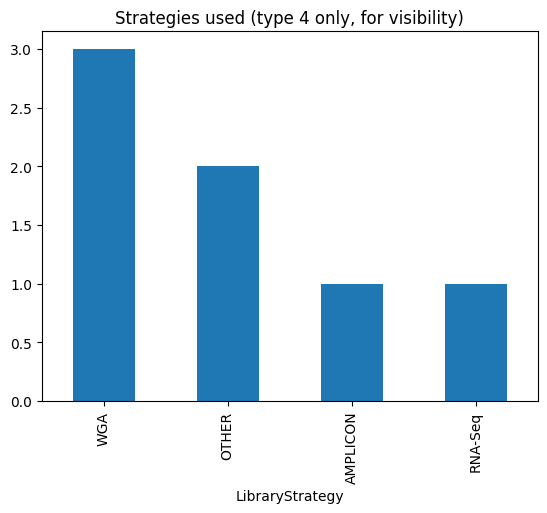

In [12]:
type4["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (type 4 only, for visibility)")

## Source (LibrarySource header)

Text(0.5, 1.0, 'Sources used (whole dataset)')

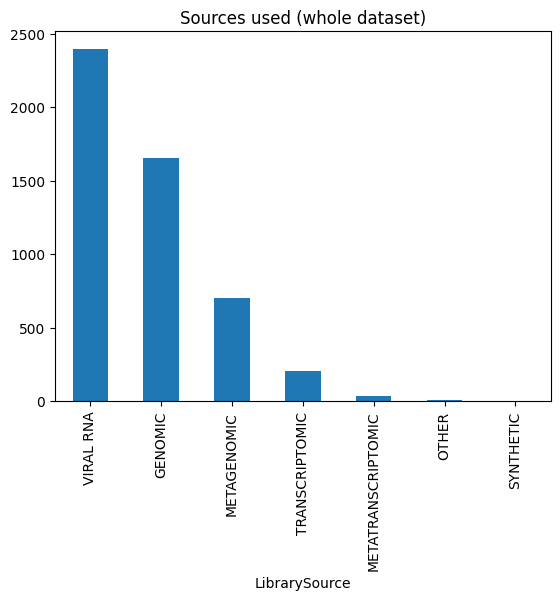

In [13]:
dataset["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (whole dataset)")

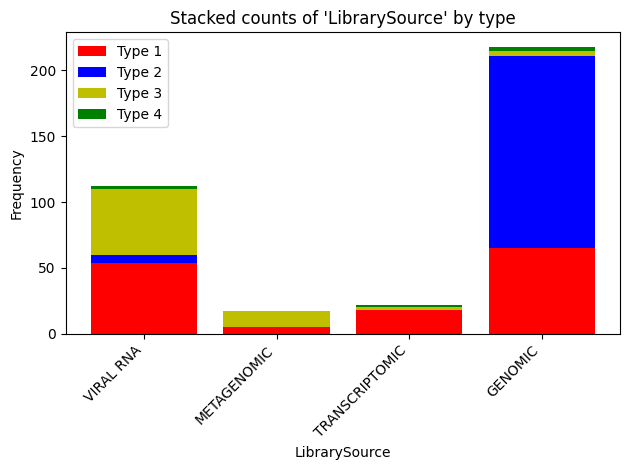

In [14]:
plot_by_column("LibrarySource")

Text(0.5, 1.0, 'Sources used (type 4 only, for visibility)')

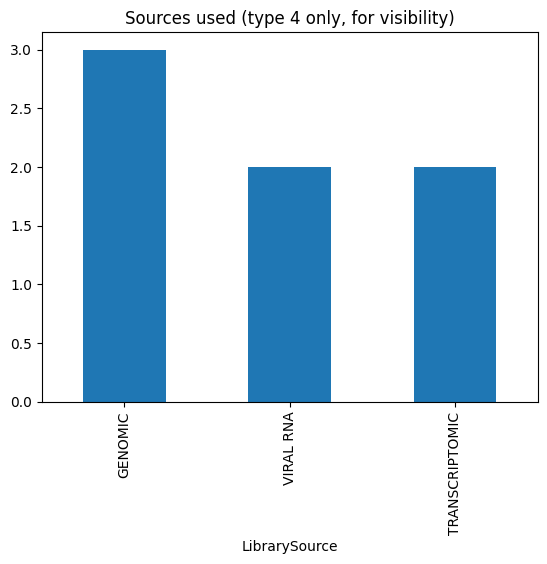

In [15]:
type4["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (type 4 only, for visibility)")

## Selection (LibrarySelection header)

Text(0.5, 1.0, 'Selections used (whole dataset)')

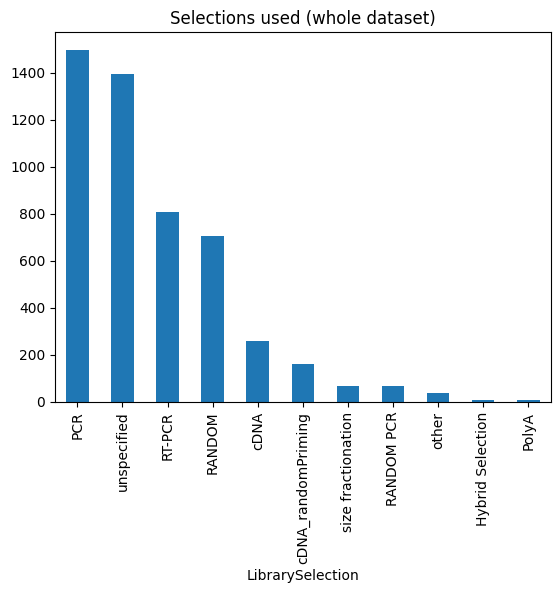

In [16]:
dataset["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (whole dataset)")

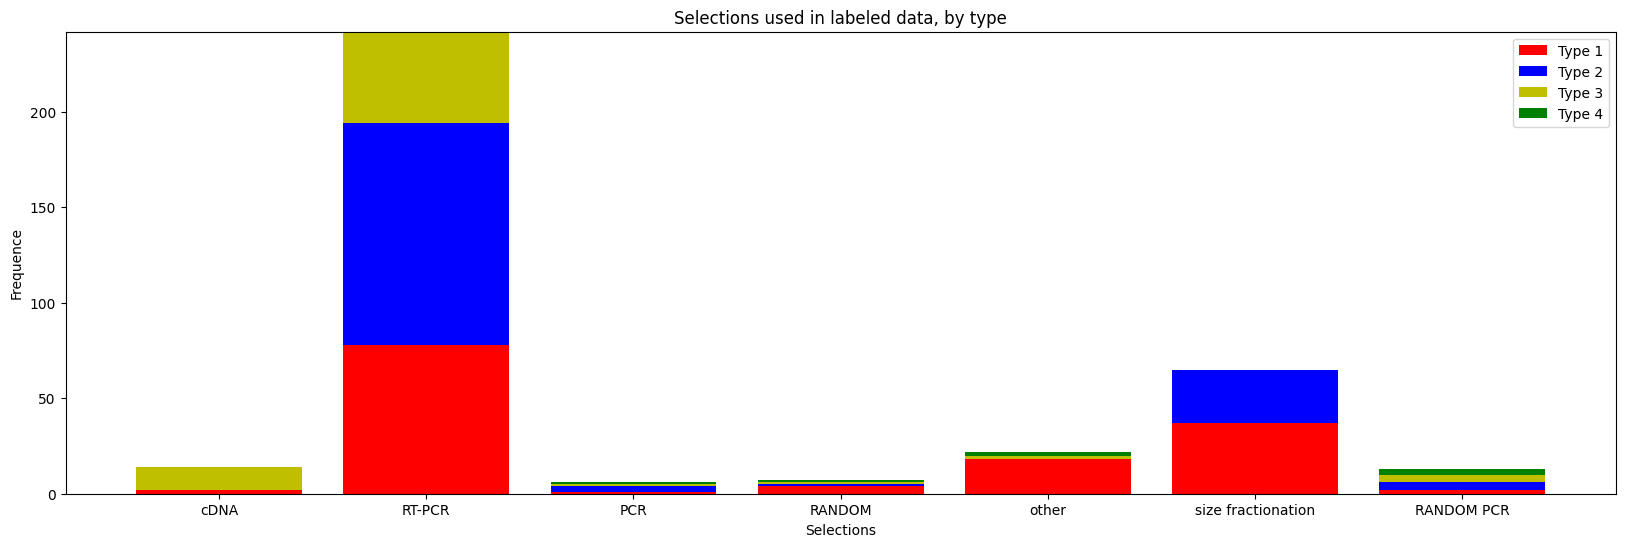

In [17]:
distinctSelections = labeled["LibrarySelection"].unique()
type1_selections = np.array([type1[type1.LibrarySelection == i].shape[0] for i in distinctSelections])
type2_selections = np.array([type2[type2.LibrarySelection == i].shape[0] for i in distinctSelections])
type3_selections = np.array([type3[type3.LibrarySelection == i].shape[0] for i in distinctSelections])
type4_selections = np.array([type4[type4.LibrarySelection == i].shape[0] for i in distinctSelections])

plt.figure(figsize=(20, 6))
plt.bar(distinctSelections, type1_selections, color='r')
plt.bar(distinctSelections, type2_selections, bottom=type1_selections, color='b')
plt.bar(distinctSelections, type3_selections, bottom=type1_selections + type2_selections, color='y')
plt.bar(distinctSelections, type4_selections, bottom=type1_selections + type2_selections + type3_selections, color='g')
plt.xlabel("Selections")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Selections used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Selections used (type 4 only for visibility)')

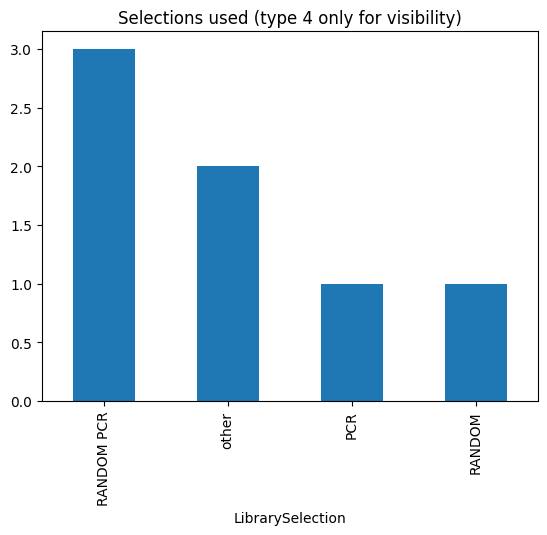

In [18]:
type4["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (type 4 only for visibility)")

## Models of the sequencers (Model header)

Text(0.5, 1.0, 'Platforms used (whole dataset)')

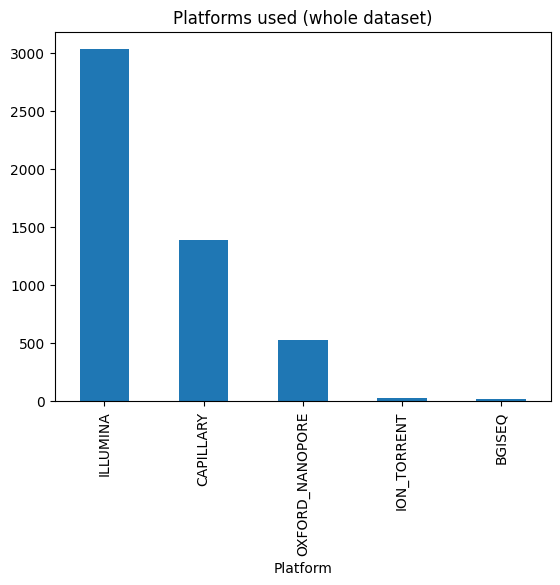

In [19]:
dataset["Platform"].value_counts().plot(kind = 'bar')
plt.title("Platforms used (whole dataset)")

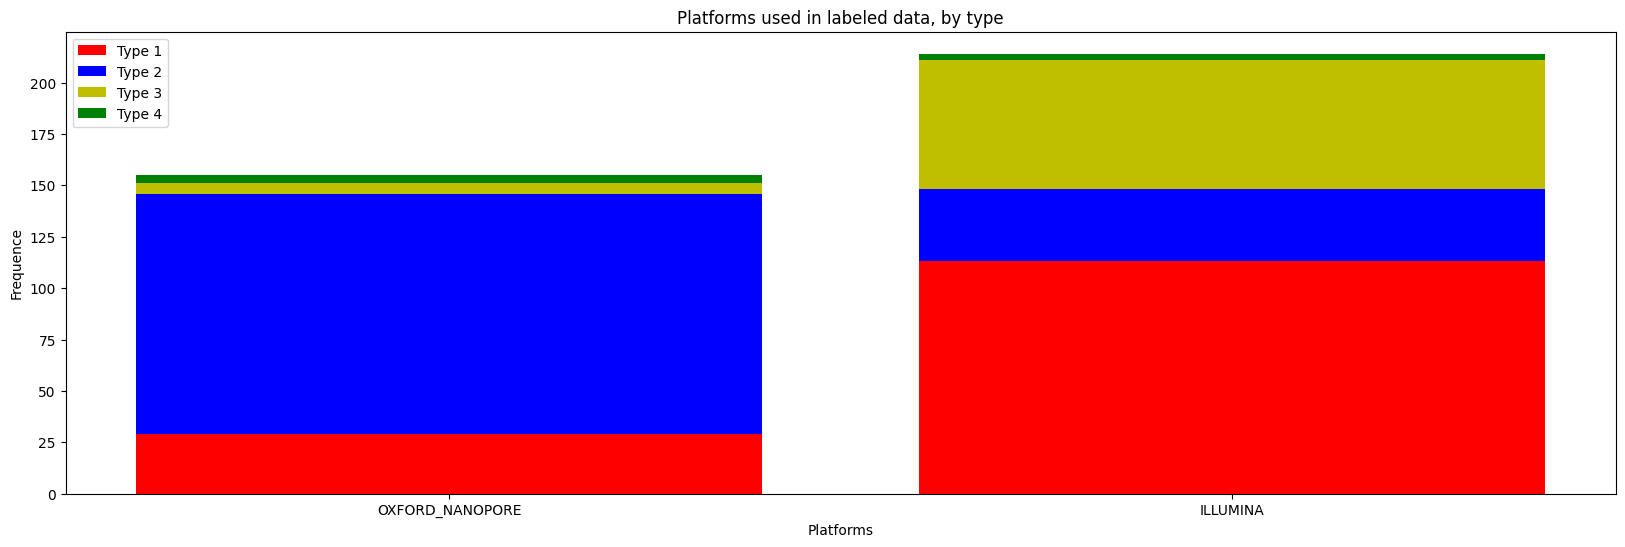

In [20]:
distinctPlatforms = labeled["Platform"].unique()
type1_platforms = np.array([type1[type1.Platform == i].shape[0] for i in distinctPlatforms])
type2_platforms = np.array([type2[type2.Platform == i].shape[0] for i in distinctPlatforms])
type3_platforms = np.array([type3[type3.Platform == i].shape[0] for i in distinctPlatforms])
type4_platforms = np.array([type4[type4.Platform == i].shape[0] for i in distinctPlatforms])

plt.figure(figsize=(20, 6))
plt.bar(distinctPlatforms, type1_platforms, color='r')
plt.bar(distinctPlatforms, type2_platforms, bottom=type1_platforms, color='b')
plt.bar(distinctPlatforms, type3_platforms, bottom=type1_platforms + type2_platforms, color='y')
plt.bar(distinctPlatforms, type4_platforms, bottom=type1_platforms + type2_platforms + type3_platforms, color='g')
plt.xlabel("Platforms")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Platforms used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (whole dataset)')

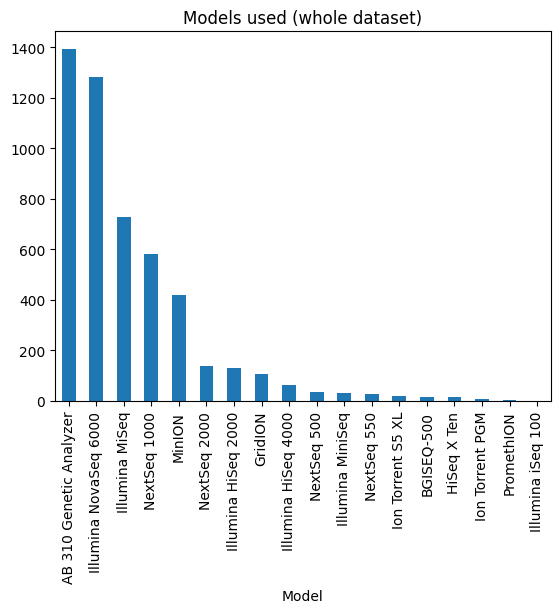

In [21]:
dataset["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (whole dataset)")

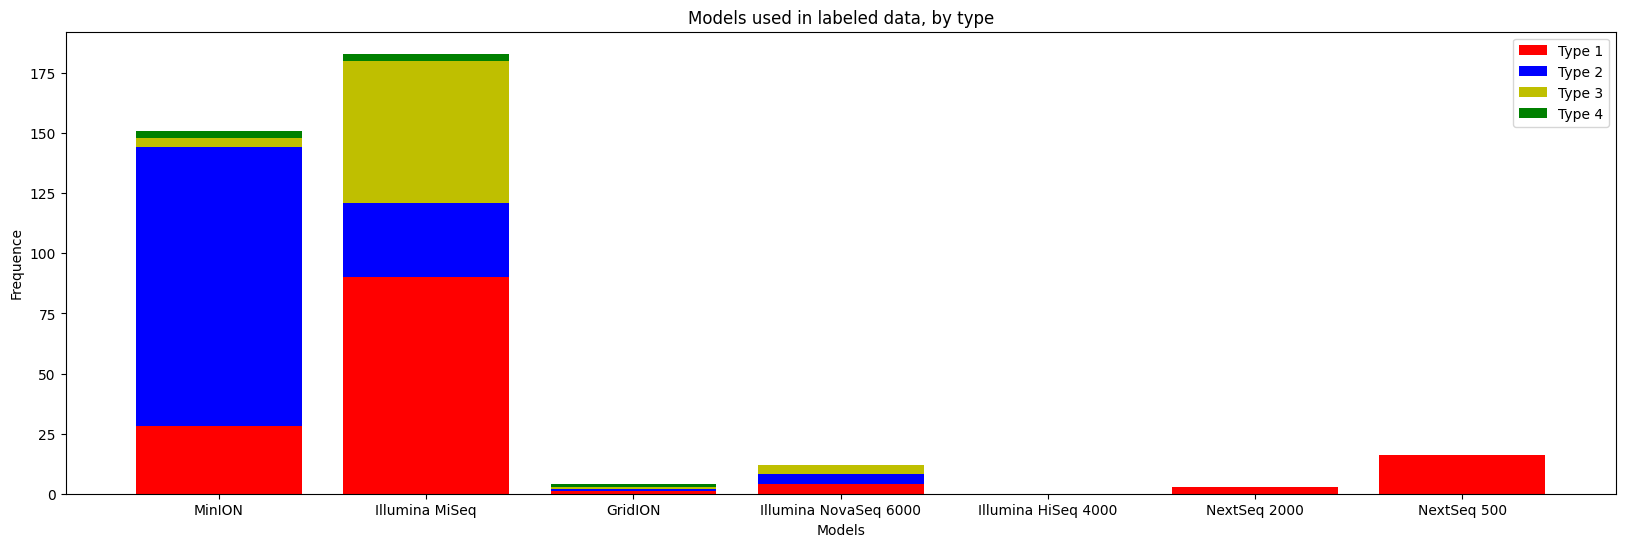

In [22]:
distinctModels = labeled["Model"].unique()
type1_models = np.array([type1[type1.Model == i].shape[0] for i in distinctModels])
type2_models = np.array([type2[type2.Model == i].shape[0] for i in distinctModels])
type3_models = np.array([type3[type3.Model == i].shape[0] for i in distinctModels])
type4_models = np.array([type4[type4.Model == i].shape[0] for i in distinctModels])

plt.figure(figsize=(20, 6))
plt.bar(distinctModels, type1_models, color='r')
plt.bar(distinctModels, type2_models, bottom=type1_models, color='b')
plt.bar(distinctModels, type3_models, bottom=type1_models + type2_models, color='y')
plt.bar(distinctModels, type4_models, bottom=type1_models + type2_models + type3_models, color='g')
plt.xlabel("Models")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Models used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (type 4 only, for visibility)')

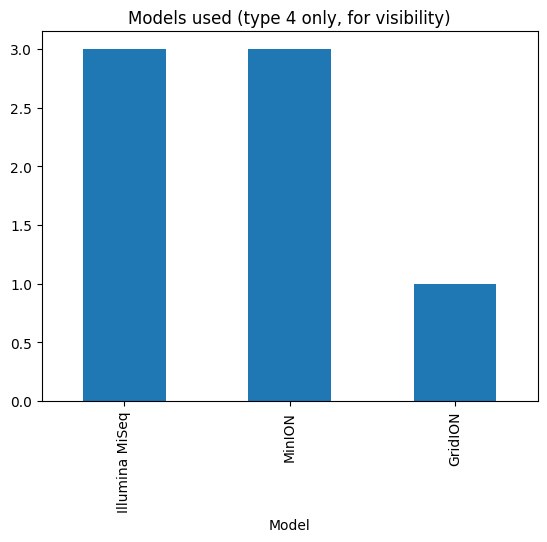

In [23]:
type4["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (type 4 only, for visibility)")

In [24]:
dataset["Run"].value_counts() # Looks fine

Run
SRR18911350    1
SRR15998134    1
SRR11071800    1
SRR11071799    1
SRR11071788    1
              ..
SRR12578628    1
SRR15998133    1
SRR15998131    1
SRR11071782    1
SRR11071783    1
Name: count, Length: 5000, dtype: int64

## avgLength and size_MB

Text(0.5, 0, 'avgLength')

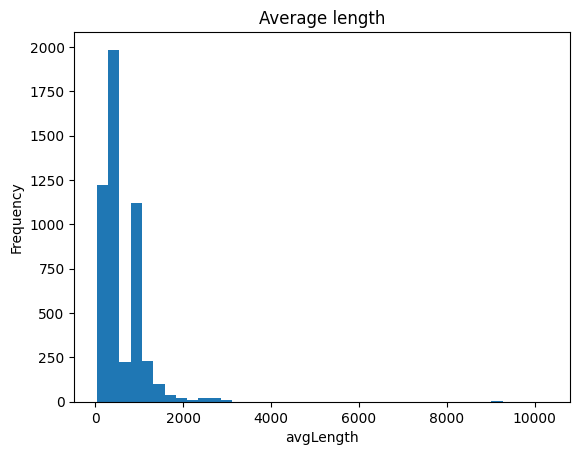

In [25]:
plt.hist(dataset["avgLength"], 40)
dataset.nlargest(10, ["avgLength"])
plt.title("Average length")
plt.ylabel("Frequency")
plt.xlabel("avgLength")

Text(0.5, 0, 'size_MB')

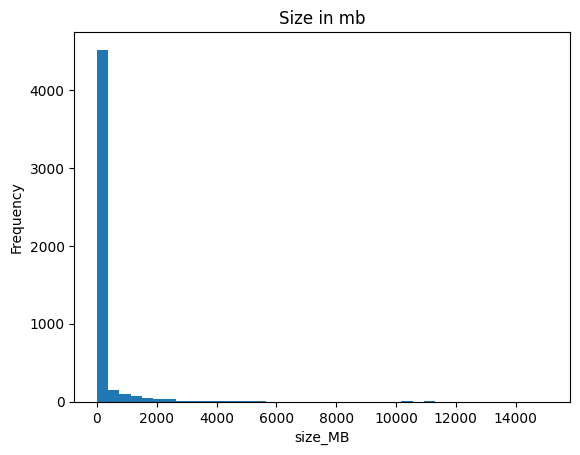

In [26]:
plt.hist(dataset["size_MB"], 40)
dataset.nlargest(10, ["size_MB"])
plt.title("Size in mb")
plt.ylabel("Frequency")
plt.xlabel("size_MB")

## TaxID

Text(0, 0.5, 'Frequency')

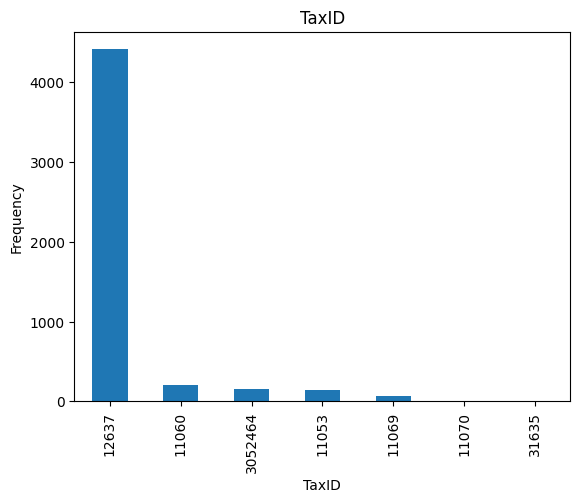

In [27]:
dataset["TaxID"].value_counts().plot(kind = "bar")
plt.title("TaxID")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

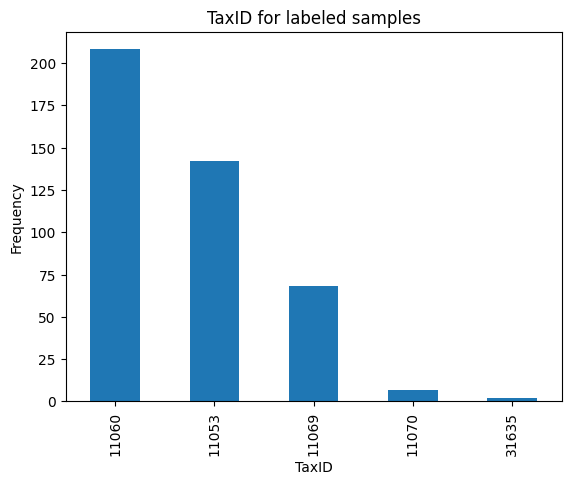

In [28]:
labeled["TaxID"].value_counts().plot(kind = "bar")
plt.title("TaxID for labeled samples")
plt.ylabel("Frequency")

In [29]:
print("TaxID for type 1")
print(type1["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 2")
print(type2["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 3")
print(type3["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 4")
print(type4["TaxID"].value_counts())


TaxID for type 1
TaxID
11053    142
Name: count, dtype: int64
-------------------
TaxID for type 2
TaxID
11060    150
31635      2
Name: count, dtype: int64
-------------------
TaxID for type 3
TaxID
11069    68
Name: count, dtype: int64
-------------------
TaxID for type 4
TaxID
11070    7
Name: count, dtype: int64


## SampleType, Sample, BioSample

In [30]:
dataset["SampleType"].value_counts()

SampleType
simple    5000
Name: count, dtype: int64

In [31]:
print("Sample in all data")
print(dataset["Sample"].value_counts())
print("------------------")
print("Sample in labeled data")
print(labeled["Sample"].value_counts())

Sample in all data
Sample
SRS5003210     1393
SRS16968265       3
SRS19653344       2
SRS19653224       2
SRS19653223       2
               ... 
SRS17213065       1
SRS20359821       1
SRS20359743       1
SRS20359822       1
SRS17212992       1
Name: count, Length: 3525, dtype: int64
------------------
Sample in labeled data
Sample
SRS24156724    1
SRS6134932     1
SRS6134933     1
SRS6134944     1
SRS6134945     1
              ..
SRS6134938     1
SRS6134942     1
SRS6134937     1
SRS6134936     1
SRS6134935     1
Name: count, Length: 427, dtype: int64


With only one exception, all samples seem (mostly) distinct. TODO: see why


In [55]:
print("BioSample in all data")
print(dataset["BioSample"].value_counts())
print("------------------")
print("BioSample in labeled data")
print(labeled["BioSample"].value_counts()) # Seems to be the same as before, TODO: verify this

BioSample in all data
BioSample
SAMN12110434    1393
SAMN33611438       3
SAMN38455815       2
SAMN38455843       2
SAMN38455842       2
                ... 
SAMN34057377       1
SAMN39748748       1
SAMN39748802       1
SAMN39748749       1
SAMN34057233       1
Name: count, Length: 3525, dtype: int64
------------------
BioSample in labeled data
BioSample
SAMN46903799    1
SAMN13897078    1
SAMN13897079    1
SAMN13897080    1
SAMN13897081    1
               ..
SAMN13897072    1
SAMN13897076    1
SAMN13897071    1
SAMN13897070    1
SAMN13897069    1
Name: count, Length: 427, dtype: int64


In [56]:
hashmap = {}

for i in range(5000):
    hashmap[dataset["Sample"][i]] = dataset["BioSample"][i]

is_equal = True

for i in range(5000):
    if(hashmap[dataset["Sample"][i]] != dataset["BioSample"][i]):
        is_equal = False

if(is_equal):
    print("There is a one to one correspondence between BioSample and Sample fields")
else:
    print("Warning: there is no correspondence between BioSample and Sample fields")

There is a one to one correspondence between BioSample and Sample fields


# BioProject, SRAStudy

In [33]:
print("BioProject in all data")
print(dataset["BioProject"].value_counts())
print("------------------")
print("BioProject in labeled data")
print(labeled["BioProject"].value_counts())

BioProject in all data
BioProject
PRJNA1072696    596
PRJNA973096     460
PRJNA951702     345
PRJNA1045842    246
PRJNA1132139    166
               ... 
PRJNA765316       1
PRJNA729800       1
PRJNA595927       1
PRJNA1216219      1
PRJNA1052714      1
Name: count, Length: 81, dtype: int64
------------------
BioProject in labeled data
BioProject
PRJNA1212489    139
PRJNA814204      72
PRJEB71472       65
PRJNA811700      44
PRJNA606238      20
PRJNA662334      17
PRJNA725703      16
PRJNA941915      12
PRJEB89228       12
PRJNA1242886     11
PRJNA1005611      7
PRJNA1118493      3
PRJNA979106       3
PRJEB66350        2
PRJNA575805       2
PRJNA1118487      1
PRJNA1052714      1
Name: count, dtype: int64


In [53]:
print("SRAStudy in all data")
print(dataset["SRAStudy"].value_counts())
print("------------------")
print("SRAStudy in labeled data")
print(labeled["SRAStudy"].value_counts()) # The 2786 samples with SRAStudy SRP202294 have an empty BioProject field, see below


SRAStudy in all data
SRAStudy
SRP202294    1393
SRP487774     596
SRP450554     460
SRP430629     345
SRP474537     246
             ... 
SRP338207       1
SRP319773       1
SRP237710       1
SRP560131       1
SRP497892       1
Name: count, Length: 82, dtype: int64
------------------
SRAStudy in labeled data
SRAStudy
SRP565854    139
SRP363178     72
ERP156272     65
SRP362090     44
SRP248407     20
SRP281234     17
SRP316685     16
SRP425958     12
ERP172269     12
SRP573686     11
SRP455139      7
SRP510978      3
SRP440819      3
ERP151415      2
SRP224336      2
SRP510973      1
SRP497892      1
Name: count, dtype: int64


In [54]:
hashmap = {}

for i in range(5000):
    hashmap[dataset["SRAStudy"][i]] = str(dataset["BioProject"][i]) # The str fonction is there to handle empty headers correctly

is_equal = True

for i in range(5000):
    if(hashmap[dataset["SRAStudy"][i]] != str(dataset["BioProject"][i])): 
        is_equal = False

if(is_equal):
    print("There is a one to one correspondence between BioProject and SRAStudy fields")
else:
    print("Warning: there is no correspondence between BioProject and SRAStudy fields")

There is a one to one correspondence between BioProject and SRAStudy fields


In [63]:
studyCounts = dataset["SRAStudy"].value_counts()
studyCounts.nlargest(20)

SRAStudy
SRP202294    1393
SRP487774     596
SRP450554     460
SRP430629     345
SRP474537     246
SRP518091     166
SRP572645     161
SRP565854     139
SRP567982     129
SRP452979     127
SRP426010     126
SRP487343     112
SRP363178      72
SRP515072      65
ERP156272      65
SRP345689      65
SRP362090      58
SRP436663      32
ERP119021      30
SRP406569      30
Name: count, dtype: int64

A quick breakdown of all studies with more than 100 samples:


In [ ]:
plus100_samples = np.unique(np.array([elt for elt in dataset["SRAStudy"] if studyCounts[elt]>=100]))

def characterizeStudy(studyname): # Given an SRAStudy value, gives (almost) all information about that study
    print("Data for SRAStudy " + str(i) + " : ")
    filtered_dataset = dataset[dataset.SRAStudy == studyname]
    print(" - Center name(s): ", end = '')
    for a in np.unique(filtered_dataset["CenterName"]):
        print(a + ", ", end = '')
    print("")
    print(" - Number of runs: " + str(studyCounts[studyname]))
    print(" - Total size (in Gb): " + str(sum(filtered_dataset["size_MB"])/1000))
    print(" - Average of avgLength: " + str(np.mean(filtered_dataset["avgLength"])))
    print(" - Scientific names used: ", end = '')
    for a in np.unique(filtered_dataset["ScientificName"]):
        print(a + ", ", end = '')
    print("")
    print(" - Strategies used: ", end = '')
    for a in np.unique(filtered_dataset["LibraryStrategy"]):
        print(a + ", ", end = '')
    print("")
    print(" - Selections used: ", end = '')
    for a in np.unique(filtered_dataset["LibrarySelection"]):
        print(a + ", ", end = '')
    print("")
    print(" - Sources used: ", end = '')
    for a in np.unique(filtered_dataset["LibrarySource"]):
        print(a + ", ", end = '')
    print("")
    print(" - Platforms used: ", end = '')
    for a in np.unique(filtered_dataset["Platform"]):
        print(a + ", ", end = '')
    print("")
    print(" - Models used: ", end = '')
    for a in np.unique(filtered_dataset["Model"]):
        print(a + ", ", end = '')
    print("")
    print("---------------------------------")

for i in plus100_samples:
    characterizeStudy(i)
    

Data for SRAStudy SRP202294 : 
 - Center name(s): BI, 
 - Number of runs: 1393
 - Total size (in Gb): 10.718
 - Average of avgLength: 1058.813352476669
 - Scientific names used: Dengue virus, 
 - Strategies used: RNA-Seq, 
 - Selections used: unspecified, 
 - Sources used: GENOMIC, 
 - Platforms used: CAPILLARY, 
 - Models used: AB 310 Genetic Analyzer, 
---------------------------------
Data for SRAStudy SRP426010 : 
 - Center name(s): AB PRISMA, 
 - Number of runs: 126
 - Total size (in Gb): 2.652
 - Average of avgLength: 475.1746031746032
 - Scientific names used: Dengue virus, 
 - Strategies used: AMPLICON, 
 - Selections used: PCR, 
 - Sources used: VIRAL RNA, 
 - Platforms used: OXFORD_NANOPORE, 
 - Models used: MinION, 
---------------------------------
Data for SRAStudy SRP430629 : 
 - Center name(s): YALE UNIVERSITY, 
 - Number of runs: 345
 - Total size (in Gb): 64.363
 - Average of avgLength: 296.76521739130436
 - Scientific names used: Dengue virus, 
 - Strategies used: AMP